## Método de Runge-Kunta - Ponto médio

$$ x_{n+1} = x_n + \Delta t f(t_n + \frac{\Delta t}{2}, x_n + \frac{\Delta t}{2}f(x_n,t_n) )  $$

## Aplicação Modelo-SIR

$$   \frac{dS}{dt} = -\frac{\beta}{N} IS $$
$$    \frac{dI}{dt} = \frac{\beta I S}{N} - \gamma I$$
$$   \frac{dR}{dt} = \gamma I $$


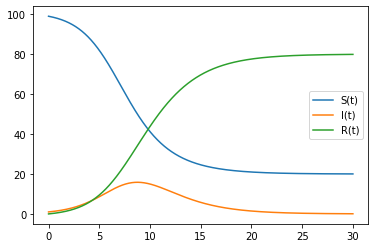

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def fS(S,I):
    return (-((b*I*S)/N))

def fI(S,I):
    return (((b*I*S)/N) - gamma*I)
def fR(I):
    return (gamma*I)

# Valores iniciais   
S_o = 99
I_o = 1
R_o = 0
t_o = 0
gamma = 0.5
b = 1
tf = 30
dt=0.001
N = S_o + I_o + R_o

    
S_list = [S_o]
I_list = [I_o]
R_list = [R_o]
t_list = [t_o]

S = S_o
I = I_o
R = R_o

t = t_o + dt
while(t < tf):
    k1S = fS(S,I) 
    k1I = fI(S,I)
    k1R = fR(I)
    Saux = S + k1S*dt/2
    Iaux = I + k1I*dt/2
    Raux = R + k1R*dt/2
    k2S = fS(Saux,Iaux)
    k2I = fI(Saux,Iaux)
    k2R = fR(Iaux)
    S = S + k2S*dt
    I = I + k2I*dt
    R = R + k2R*dt
    
    S_list.append(S)
    I_list.append(I)
    R_list.append(R)
    t_list.append(t)
    
    t += dt

plt.plot(t_list,S_list,label="S(t)")
plt.plot(t_list,I_list,label="I(t)")
plt.plot(t_list,R_list,label="R(t)")
plt.legend()